# Time series learning tasks

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## Learning objectives

You'll learn about

* different time series learning tasks
* how to tell them apart

---

## Single series

Time series comes in many shapes and forms. 

As an example, consider that we observe a chemical process in a [bioreactor](https://en.wikipedia.org/wiki/Bioreactor).  

<img src="../images/bioreactor.png" width=200 />


We may observe the repeated sensor readings for the pressure over time from a single bioreactor run. 

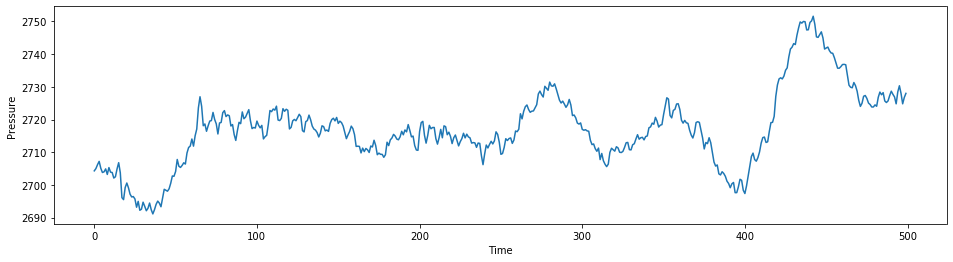

In [2]:
from utils import load_pressure

pressure = load_pressure()
fig, ax = plt.subplots(1, figsize=(16, 4))
pressure.plot(ax=ax)
ax.set(ylabel="Pressure", xlabel="Time");

Suppose you only have a single time series, what are some real-world problems that you encounter and may want to solve with machine learning? 

* Time series annotation (e.g. outlier/anomaly detection, segmentation)
* Forecasting

---

## Multiple time series

You may observe multiple time series. There are two ways in which this can happen:

### Multivariate time series
Here we observe two or more variables over time, with variables representing *different kinds of measurements* within a single *experimental unit* (e.g. readings from different sensors of a single chemical process).

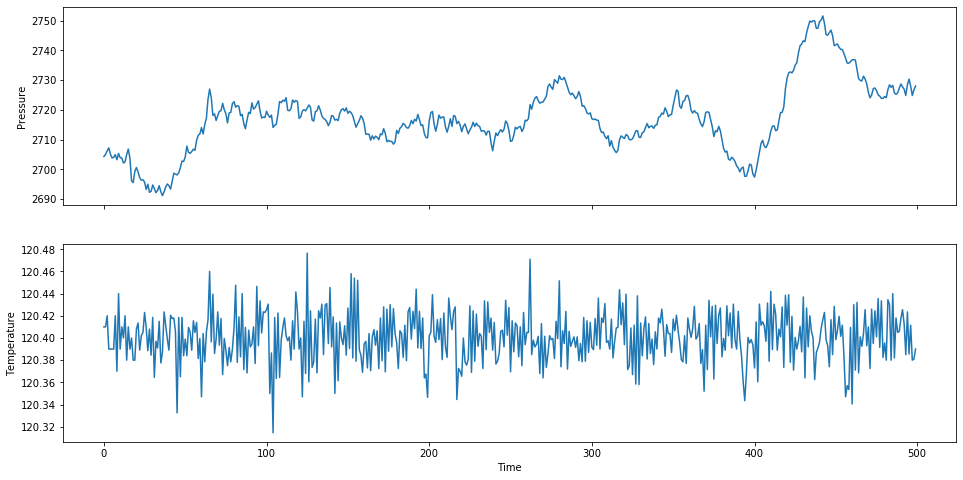

In [3]:
from utils import load_temperature

temperature = load_temperature()
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(16, 8), sharex=True)
pressure.plot(ax=ax0)
ax0.set(ylabel="Pressure")
temperature.plot(ax=ax1)
ax1.set(ylabel="Temperature", xlabel="Time");

Suppose you have multivariate time series, what are some real-world problems that you encounter and may want to solve with machine learning? 

* Time series annotation with additional variables
* Forecasting with exogenous variables
* Vector forecasting (forecasting multiple series at the same time)

---

### Panel data 
Sometimes also called longitudinal data, here we observe multiple independent instances of the *same kind(s) of measurements* over time, e.g. sensor readings from multiple separate chemical processes). 

Panel data may be multivariate (i.e. i.i.d. instances of multivariate time series). In this case, the different instances are i.i.d., but the univariate component series within an instance are not. 

Panel data may also be mixed with time-constant variables. 

In [4]:
from utils import load_experiments
experiments = load_experiments(variables="pressure")

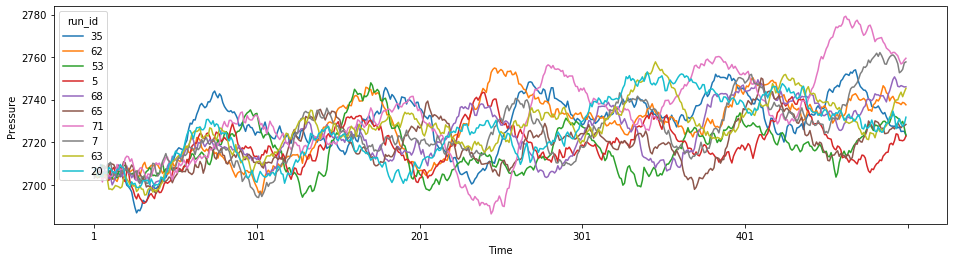

In [5]:
fig, ax = plt.subplots(1, figsize=(16, 4))
experiments.sample(10).T.plot(ax=ax)
ax.set(ylabel="Pressure", xlabel="Time");

Suppose you have panel data, what are some real-world problems that you encounter and may want to solve with machine learning? 

* Supervised time series annotation
* Panel/supervised forecasting
* "Series-as-features" learning tasks, i.e. time series classification/regression/clustering

---
## Why does it matter?

In machine learning, we're often interested in estimating the performance of our algorithm, so that we have a better idea of how well our model will perform when we deploy it. But if we want to make sure that our estimates are reliable, we need to take into account the statistical dependence of the data we use to obtain our estimates. 

* An intrinsic characteristic of time series is that observations are statistically depend on past observations. So, they don't naturally fit into the standard machine learning setting where we assume to have i.i.d. instances.
* In multivariate data, it is implausible to assume that the different univariate component time series are independent and identically distributed (i.i.d.). 
* In panel data, it is plausible to assume that the different instances are i.i.d., while time series observations within a given instance may still depend on past observations. 

---
## More complications

In many real-world application, we find time-heterogeneous data:

* Instances/variables may not share a common time index, e.g. unequal length time series data, timestamped data


---
## How to represent this kind of data for the purpose of machine learning?

* Which format (wide format, long format, etc)?
* Which data container to use (numpy, pandas, xarray, custom data container, etc)? 

For more details, see our [wiki entry](https://github.com/alan-turing-institute/sktime/wiki/Time-series-data-container)

---
## Summary

We've discussed different time series learning tasks and how to tell them apart. 

For more details, see our [paper](http://learningsys.org/neurips19/assets/papers/sktime_ml_systems_neurips2019.pdf).

Here we summarise the different learning tasks in more technical terms:

* **Time series regression/classification.** We observe $N$ i.i.d. panel data training instances of feature-label pairs $(\textbf{x}_i, y_i)$, $i=1\dots N$.
    Let $((\textbf{x}_i, y_i))_{i=1}^N$ be  a sequence of $N$ i.i.d. feature-label pairs panel data training instances.
    For each instance, a feature is a time series $\textbf{x}_i = (x_i(t_1) \dots x_i(t_T))$. The task is to use the training data to learn a predictor $\hat{f}$ that can accurately predict a new target value, such that $\hat{y} = \hat{f}(\textbf{x}_{*})$ for a new input time series $\textbf{x}_{*}$. For regression, $y_i\in\mathbb{R}$. For classification, $y_i$ takes a value from a finite set of class values. Additionally, time-invariant features may be present. Compared to the tabular supervised setting, the only difference is that some features are series, instead of primitives (e.g. numbers or strings). Important sub-cases are (i) equally spaced observation times and (ii) equal length time series.
    
* **Classical forecasting.** Given past observations $\textbf{y} = (y(t_1)\dots y(t_T))$ of a single time series, the task is to learn a forecaster $\hat{f}$ which can make accurate temporal forward predictions $\hat{y} = \hat{f}(h_j)$ of observations at given time points $h_1\dots h_H$ of the forecasting horizon, where $\hat{\textbf{y}} = (\hat{y}(h_1) \dots \hat{y}(h_H))$ denotes the forecasted series. No i.i.d. assumption is made. Variants may be distinguished by the following:
    (i) whether one observes additional related time series (multivariate data);
    (ii) for multivariate data, whether one forecasts a single series or multiple series jointly (exogeneity vs vector forecasting);
    (iii) whether the forecasting horizon lies in the observed time horizon (in-sample predictions), in the future of the observed time series (forecasting), or for multivariate data, only in the future of the target variable but not the exogenous variables (nowcasting);
    (iii) whether $\mathcal{Y}=\mathcal{X}$ and the forecast time series is interpreted as a continuation $\hat{\textbf{y}}$ of the entire past time series $\textbf{x}$ or not (exogeneity);
    (iv) whether there is a single time point to forecast ($H=1$) or not (single-step vs multi-step); (v) whether the forecasting horizon is already known during training or only during forecasting (functional vs discrete forecast).

* **Supervised/panel forecasting.** We observe $N$ i.i.d. panel data training instances $(\textbf{y}_i)$, $i=1 \dots N$. Each instance is a sequence of past observations $\textbf{y}_i = (y_i(t_1)\dots y_i(t_T))$. The task is to use the training data to learn a supervised forecaster $\hat{f}$ that can make accurate temporal forward predictions $\hat{y}_i = \hat{f}(\textbf{y}_{*}, h_j)$ for a new instance $ \textbf{y}_{*}$ at given time points $h_1\dots h_H$ of the forecasting horizon, where $\hat{y}_i = (\hat{y}_i(h_1) \dots \hat{y}_i(h_H))$ is the forecasted series.
    The training instances do not necessarily lie in the past of $\hat{\textbf{y}}$ and may involve observations at past and future time points.
    Variants include panel data with additional time-constant features and the same variants as found in classical forecasting. 

* **Time series annotation.** For given observations $\textbf{x} = (x(t_1)\dots x(t_T))$ of a single time series, the task is to learn an annotator that accurately predicts a series of annotations $\hat{\textbf{y}} = (\hat{y}(a_1)\dots \hat{y}(a_A))$ for the observed series $\textbf{x}$, where $a_1\dots a_A$ denotes the time indices of the annotations. The task varies by value domain and interpretation of the annotations $\hat{\textbf{y}}$ in relation to $\textbf{x}$: (i) in change-point detection, $\hat{\textbf{y}}$ contains change points and the type of change point; (ii) in anomaly detection, the $a_j$ are a sub-set of the $t_j$ and indicate anomalies, possibly with the anomaly type; (iii) in segmentation, the $a_j$ are interpreted to subdivide the series $\textbf{x}$ into segments, annotated by the type of segment. Time series annotation is also found in supervised form, with partial annotations within a single time series, or multiple annotated i.i.d. panel data training instances as well as in entirely unsupervised form.

sktime currently supports time series classification/regression and forecasting, but eventually we want to also support time series clustering and time series annotation. 

---

## Reduction

While these tasks are distinct, they are also related. 

Reduction is essentially the idea that an algorithm for one task can be adapted to help solve another task.

A classical example of reduction in supervised learning is one-vs-all classification, reducing 𝑘-way multi-category classification to 𝑘 binary classification tasks. 

### Example: from forecasting to standard regression
For time series, a common example is reduce classical forecastingto regression, which is usually done as follows: We first split the training series into fixed-length windows and stackthem on top of each other. This gives us a tabular matrix of lagged values and allows us to apply any tabular regression algorithm. Once we have a fitted regression algorithm, we can generate forecasts recursively

![](../images/forecasting-to-regression-reduction.png)

In [6]:
from sktime.forecasting.model_selection import SlidingWindowSplitter

cv = SlidingWindowSplitter(start_with_window=True, window_length=10)
for x_window, y_window in cv.split(pressure.iloc[:20]):
    print(x_window, y_window)

[0 1 2 3 4 5 6 7 8 9] [10]
[ 1  2  3  4  5  6  7  8  9 10] [11]
[ 2  3  4  5  6  7  8  9 10 11] [12]
[ 3  4  5  6  7  8  9 10 11 12] [13]
[ 4  5  6  7  8  9 10 11 12 13] [14]
[ 5  6  7  8  9 10 11 12 13 14] [15]
[ 6  7  8  9 10 11 12 13 14 15] [16]
[ 7  8  9 10 11 12 13 14 15 16] [17]
[ 8  9 10 11 12 13 14 15 16 17] [18]
[ 9 10 11 12 13 14 15 16 17 18] [19]


In [7]:
X_list = []
y_list = []

for x_window, y_window in cv.split(pressure):
    x_values = pressure.iloc[x_window]
    y_values = pressure.iloc[y_window]
    X_list.append(x_values)
    y_list.append(y_values)

X = np.vstack(X_list)
y = np.hstack(y_list)
print(X.shape, y.shape)

(490, 10) (490,)


This converts the single time series into the required tabular format, so that we can use standard regression algorithm from scikit-learn.

More on this in our [next notebook on forecasting](https://github.com/sktime/sktime-tutorial-pydata-amsterdam-2020/blob/master/02_forecasting.ipynb).

### More reductions

There are many more reduction relations, here's an overview:

![](../images/reduction-relations.png)

For more details, see our [paper](http://learningsys.org/neurips19/assets/papers/sktime_ml_systems_neurips2019.pdf).

## References

* Löning, Markus, Anthony Bagnall, Sajaysurya Ganesh, Viktor Kazakov, Jason Lines, and Franz J. Király (2019), "sktime: A Unified Interface for Machine Learning with Time Series." Workshop on Systems for ML at NeurIPS 2019.
* The data that we're using in this notebook is an small extract from the Tennessee Eastman Process Simulation Data for Anomaly Detection. You can download the full data set [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/6C3JR1).